In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/btc_exchange_rates.csv")

df["date"] = pd.to_datetime(df["date"])

df

,date,price_usd,price_eur
0,2025-04-20 16:04:44.724,84357.124867,74176.991396
1,2025-04-20 17:04:34.686,84598.168647,74388.946253
2,2025-04-20 18:04:48.198,84563.859429,74358.777437
3,2025-04-20 19:04:44.699,84561.238706,74356.472980
4,2025-04-20 20:04:45.731,84633.096311,74419.658881
...,...,...,...
2155,2025-07-19 12:04:00.226,118387.984219,101807.747029
2156,2025-07-19 13:04:09.812,118278.772828,101713.830693
2157,2025-07-19 14:03:23.188,118217.533576,101661.167998
2158,2025-07-19 15:03:41.100,117786.430237,101290.440682


In [3]:
df["month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.day)

df

,date,price_usd,price_eur,month,day
0,2025-04-20 16:04:44.724,84357.124867,74176.991396,4,20
1,2025-04-20 17:04:34.686,84598.168647,74388.946253,4,20
2,2025-04-20 18:04:48.198,84563.859429,74358.777437,4,20
3,2025-04-20 19:04:44.699,84561.238706,74356.472980,4,20
4,2025-04-20 20:04:45.731,84633.096311,74419.658881,4,20
...,...,...,...,...,...
2155,2025-07-19 12:04:00.226,118387.984219,101807.747029,7,19
2156,2025-07-19 13:04:09.812,118278.772828,101713.830693,7,19
2157,2025-07-19 14:03:23.188,118217.533576,101661.167998,7,19
2158,2025-07-19 15:03:41.100,117786.430237,101290.440682,7,19


In [4]:
# Volatilidad Diaria

df_volatilidad = pd.DataFrame()

for month in range(4, 8):
    for day in range(1, 32):
        df_bucle = df[(df["month"] == month) & (df["day"] == day)].tail(1)

        df_volatilidad = pd.concat([df_volatilidad, df_bucle], axis = 0, ignore_index = True)

df_volatilidad

,date,price_usd,price_eur,month,day
0,2025-04-20 23:04:46.701,84832.447383,74201.329909,4,20
1,2025-04-21 23:03:19.294,87118.984144,75619.016880,4,21
2,2025-04-22 23:09:36.120,92890.820730,81893.569355,4,22
3,2025-04-23 23:06:23.353,93775.799494,82749.547214,4,23
4,2025-04-24 23:01:45.573,93463.484321,82080.192711,4,24
...,...,...,...,...,...
86,2025-07-15 23:00:19.743,117703.390688,101434.192621,7,15
87,2025-07-16 23:03:45.273,118745.983713,102046.379786,7,16
88,2025-07-17 23:03:47.855,119897.275633,103206.255995,7,17
89,2025-07-18 23:03:28.617,117737.832627,101248.649167,7,18


In [5]:
df_volatilidad["price_usd_shift"] = df_volatilidad["price_usd"].shift(1)

df_volatilidad["price_eur_shift"] = df_volatilidad["price_eur"].shift(1)

In [6]:
df_volatilidad["rendimientos_diarios_usd"] = df_volatilidad.apply(lambda x : (x["price_usd"] - x["price_usd_shift"])/x["price_usd_shift"], axis = 1)
df_volatilidad["rendimientos_diarios_eur"] = df_volatilidad.apply(lambda x : (x["price_eur"] - x["price_eur_shift"])/x["price_eur_shift"], axis = 1)

In [7]:
df_volatilidad["rendimientos_diarios_usd"].std()
df_volatilidad["rendimientos_diarios_eur"].std()

np.float64(0.018368512645384683)

In [8]:
df_volatilidad

,date,price_usd,price_eur,month,day,price_usd_shift,price_eur_shift,rendimientos_diarios_usd,rendimientos_diarios_eur
0,2025-04-20 23:04:46.701,84832.447383,74201.329909,4,20,NaN,NaN,NaN,NaN
1,2025-04-21 23:03:19.294,87118.984144,75619.016880,4,21,84832.447383,74201.329909,0.026954,0.019106
2,2025-04-22 23:09:36.120,92890.820730,81893.569355,4,22,87118.984144,75619.016880,0.066252,0.082976
3,2025-04-23 23:06:23.353,93775.799494,82749.547214,4,23,92890.820730,81893.569355,0.009527,0.010452
4,2025-04-24 23:01:45.573,93463.484321,82080.192711,4,24,93775.799494,82749.547214,-0.003330,-0.008089
...,...,...,...,...,...,...,...,...,...
86,2025-07-15 23:00:19.743,117703.390688,101434.192621,7,15,120085.431435,102923.061745,-0.019836,-0.014466
87,2025-07-16 23:03:45.273,118745.983713,102046.379786,7,16,117703.390688,101434.192621,0.008858,0.006035
88,2025-07-17 23:03:47.855,119897.275633,103206.255995,7,17,118745.983713,102046.379786,0.009695,0.011366
89,2025-07-18 23:03:28.617,117737.832627,101248.649167,7,18,119897.275633,103206.255995,-0.018011,-0.018968


In [9]:
# Volatilidad Horaria

df_v_horaria = df.copy()

df_v_horaria["price_usd_shift"] = df_v_horaria["price_usd"].shift(1)
df_v_horaria["price_eur_shift"] = df_v_horaria["price_eur"].shift(1)

df_v_horaria["rendimientos_horarios_usd"] = df_v_horaria.apply(lambda x : (x["price_usd"] - x["price_usd_shift"])/x["price_usd_shift"], axis = 1)
df_v_horaria["rendimientos_horarios_eur"] = df_v_horaria.apply(lambda x : (x["price_eur"] - x["price_eur_shift"])/x["price_eur_shift"], axis= 1)

df_v_horaria[["rendimientos_horarios_usd", "rendimientos_horarios_eur"]].std()

print("Volatilidad horaria USD:", df_v_horaria["rendimientos_horarios_usd"].std())
print("Volatilidad horaria EUR:", df_v_horaria["rendimientos_horarios_eur"].std())

Volatilidad horaria USD: 0.0034456270416703023
Volatilidad horaria EUR: 0.00354522795768593


In [10]:
# Volatilidad Diaria Por Día

volatilidad_diaria_dia_usd = list()

for i in range(len(df_volatilidad["rendimientos_diarios_usd"])):
    volatilidad_diaria_dia_usd.append(df_volatilidad["rendimientos_diarios_usd"][:i + 1].std())

df_volatilidad["volatilidad_diaria_dia_usd"] = volatilidad_diaria_dia_usd

df_volatilidad

volatilidad_diaria_dia_eur = list()

for i in range(len(df_volatilidad["rendimientos_diarios_eur"])):
    volatilidad_diaria_dia_eur.append(df_volatilidad["rendimientos_diarios_eur"][:i + 1].std())
df_volatilidad["volatilidad_diaria_dia_eur"] = volatilidad_diaria_dia_eur


In [11]:
print(df_volatilidad["volatilidad_diaria_dia_usd"].dropna())
print(df_volatilidad["volatilidad_diaria_dia_eur"].dropna())


2     0.027788
3     0.029057
4     0.030263
5     0.026528
6     0.025813
        ...   
86    0.017544
87    0.017450
88    0.017360
89    0.017419
90    0.017321
Name: volatilidad_diaria_dia_usd, Length: 89, dtype: float64
2     0.045163
3     0.039610
4     0.039571
5     0.034691
6     0.032608
        ...   
86    0.018614
87    0.018507
88    0.018418
89    0.018473
90    0.018369
Name: volatilidad_diaria_dia_eur, Length: 89, dtype: float64


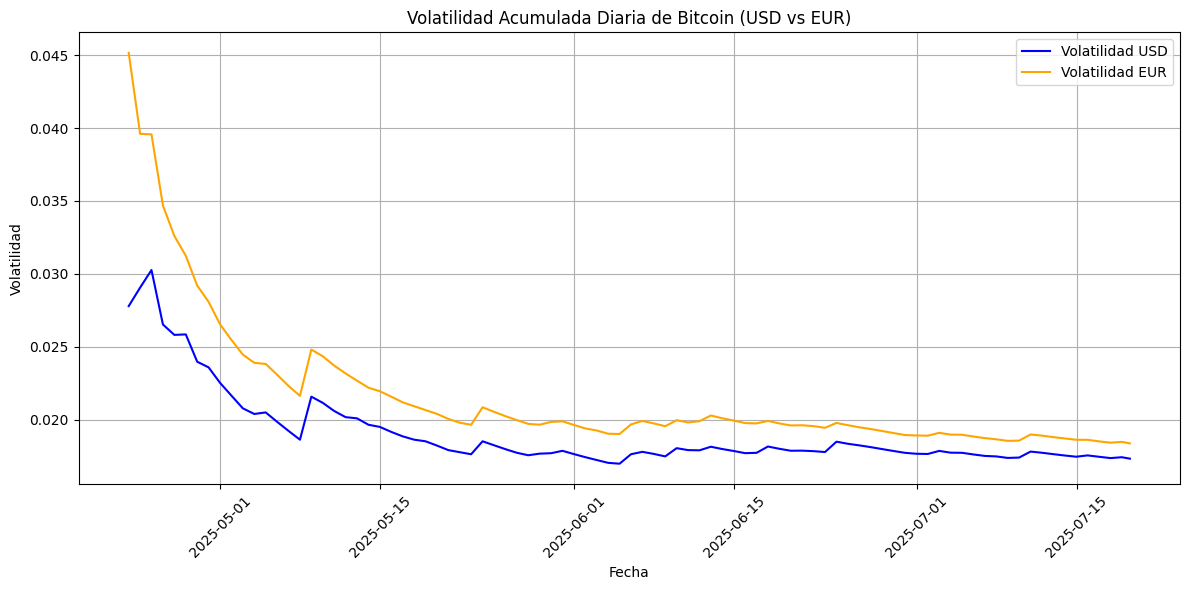

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_volatilidad["date"], df_volatilidad["volatilidad_diaria_dia_usd"], label="Volatilidad USD", color="blue")
plt.plot(df_volatilidad["date"], df_volatilidad["volatilidad_diaria_dia_eur"], label="Volatilidad EUR", color="orange")
plt.title("Volatilidad Acumulada Diaria de Bitcoin (USD vs EUR)")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df_volatilidad.to_csv("../../data/btc_volatilidad_diaria.csv", index=False)
print("✅ CSV de volatilidad diaria guardado en: ../../data/btc_volatilidad_diaria.csv")

df_v_horaria.to_csv("../../data/btc_volatilidad_horaria.csv", index=False)
print("✅ CSV de volatilidad horaria guardado en: ../../data/btc_volatilidad_horaria.csv")

✅ CSV de volatilidad diaria guardado en: ../../data/btc_volatilidad_diaria.csv
✅ CSV de volatilidad horaria guardado en: ../../data/btc_volatilidad_horaria.csv
